In [1]:
import pickle
import pandas as pd
import numpy as np
import os

In [2]:

file_path = 'D:\\Bioinformatics\\personal research\\WCM output\\NEW_df_wildtype_bms.pkl'

# Open the file in binary read mode
with open(file_path, 'rb') as file:
    wild = pickle.load(file)

In [3]:
wild['id'] = wild['gene_ko'].apply(lambda x: x.split('/')[-1])

wildtype_zipAaa = wild[['date_of_sim','id','generation','time','cellMass','L-ASPARTATE[c]','G7258-MONOMER[i]']]

wildtype_zipAaa = wildtype_zipAaa[wildtype_zipAaa['date_of_sim'] == '20230919']

# Process the generation column, split each value by an underscore (_), and convert the last part to an integer.
wildtype_zipAaa.loc[:,'generation'] = wildtype_zipAaa['generation'].apply(lambda x: int(x.split('_')[-1]))

# Sort by generation
wildtype_zipAaa=wildtype_zipAaa.sort_values(by=['id','generation'])
print(wildtype_zipAaa)

    date_of_sim      id generation  \
297    20230919  000000          0   
296    20230919  000000          1   
299    20230919  000000          2   
294    20230919  000000          3   
298    20230919  000000          4   
..          ...     ...        ...   
2      20230919  000099          1   
5      20230919  000099          2   
0      20230919  000099          3   
4      20230919  000099          4   
1      20230919  000099          5   

                                                  time  \
297  [0.0, 60.0, 120.0, 180.0, 240.0, 300.0, 360.0,...   
296  [2499.0, 2559.0, 2619.0, 2679.0, 2739.0, 2799....   
299  [5362.0, 5422.0, 5482.0, 5542.0, 5602.0, 5662....   
294  [8550.0, 8610.0, 8670.0, 8730.0, 8790.0, 8850....   
298  [11625.0, 11685.0, 11745.0, 11805.0, 11865.0, ...   
..                                                 ...   
2    [3173.0, 3233.0, 3293.0, 3353.0, 3413.0, 3473....   
5    [6311.0, 6371.0, 6431.0, 6491.0, 6551.0, 6611....   
0    [9789.0, 9849.0,

In [4]:
wildtype_zipAaa['time'] = wildtype_zipAaa['time'].apply(lambda x: x if isinstance(x, list) else [x])
wildtype_zipAaa['cellMass'] = wildtype_zipAaa['cellMass'].apply(lambda x: x if isinstance(x, list) else [x])
wildtype_zipAaa['L-ASPARTATE[c]'] = wildtype_zipAaa['L-ASPARTATE[c]'].apply(lambda x: x if isinstance(x, list) else [x])
wildtype_zipAaa['G7258-MONOMER[i]'] = wildtype_zipAaa['G7258-MONOMER[i]'].apply(lambda x: x if isinstance(x, list) else [x])

In [5]:
time_exploded = wildtype_zipAaa.explode('time')
cellMass_exploded = wildtype_zipAaa.explode('cellMass')
aa_exploded = wildtype_zipAaa.explode('L-ASPARTATE[c]')
zip_exploded = wildtype_zipAaa.explode('G7258-MONOMER[i]')
# 合并展开后的列，确保索引对齐
wildtype_zipaa_exploded = time_exploded.copy()
wildtype_zipaa_exploded['cellMass'] = cellMass_exploded['cellMass'].values
wildtype_zipaa_exploded['L-ASPARTATE[c]'] = aa_exploded['L-ASPARTATE[c]'].values
wildtype_zipaa_exploded['G7258-MONOMER[i]'] = zip_exploded['G7258-MONOMER[i]'].values
# 保留需要的列
wildtype_zipAaa = wildtype_zipaa_exploded[['date_of_sim', 'id', 'time', 'generation', 'cellMass', 'L-ASPARTATE[c]','G7258-MONOMER[i]']]

# 输出前 50 行
print(wildtype_zipAaa.head(50))

    date_of_sim      id                                               time  \
297    20230919  000000  [0.0, 60.0, 120.0, 180.0, 240.0, 300.0, 360.0,...   
296    20230919  000000  [2499.0, 2559.0, 2619.0, 2679.0, 2739.0, 2799....   
299    20230919  000000  [5362.0, 5422.0, 5482.0, 5542.0, 5602.0, 5662....   
294    20230919  000000  [8550.0, 8610.0, 8670.0, 8730.0, 8790.0, 8850....   
298    20230919  000000  [11625.0, 11685.0, 11745.0, 11805.0, 11865.0, ...   
295    20230919  000000  [14833.0, 14893.0, 14953.0, 15013.0, 15073.0, ...   
537    20230919  000001  [0.0, 60.0, 120.0, 180.0, 240.0, 300.0, 360.0,...   
536    20230919  000001  [2546.0, 2606.0, 2666.0, 2726.0, 2786.0, 2846....   
539    20230919  000001  [5551.0, 5611.0, 5671.0, 5731.0, 5791.0, 5851....   
534    20230919  000001  [9198.0, 9258.0, 9318.0, 9378.0, 9438.0, 9498....   
538    20230919  000001  [13030.0, 13090.0, 13150.0, 13210.0, 13270.0, ...   
535    20230919  000001  [15667.0, 15727.0, 15787.0, 15847.0, 15

In [6]:
# 分别展开 'time'、'cellMass' 和 'EG10347-MONOMER[c]' 列
time_exploded = wildtype_zipAaa.explode('time')
cellMass_exploded = wildtype_zipAaa.explode('cellMass')
aa_exploded = wildtype_zipAaa.explode('L-ASPARTATE[c]')
zip_exploded = wildtype_zipAaa.explode('G7258-MONOMER[i]')
# 合并展开后的列，确保索引对齐
wildtype_zipaa_exploded = time_exploded.copy()
wildtype_zipaa_exploded['cellMass'] = cellMass_exploded['cellMass'].values
wildtype_zipaa_exploded['L-ASPARTATE[c]'] = aa_exploded['L-ASPARTATE[c]'].values
wildtype_zipaa_exploded['G7258-MONOMER[i]'] = zip_exploded['G7258-MONOMER[i]'].values
# 保留需要的列
wildtype_zipaa_exploded = wildtype_zipaa_exploded[['date_of_sim', 'id', 'time', 'generation', 'cellMass', 'L-ASPARTATE[c]','G7258-MONOMER[i]']]

#wildtype_growth_exploded.loc[:, 'label'] = wildtype_growth_exploded.groupby(['date_of_sim', 'id'])['generation'].diff().fillna(0).ne(0).astype(int)
# 输出前 50 行以确认数据格式

#wildtype_growth_exploded =wildtype_growth_exploded.fillna(0)
print(wildtype_zipaa_exploded.head(50))

output_path = 'D:\\Bioinformatics\\personal research\\WCM output\\zipA+aa\\wildtype_zipaa.csv'
wildtype_zipaa_exploded.to_csv(output_path, index=False)

print("文件已保存到：", output_path)

    date_of_sim      id    time generation     cellMass L-ASPARTATE[c]  \
297    20230919  000000     0.0          0   1321.14572        1832078   
297    20230919  000000    60.0          0  1335.834018        1852403   
297    20230919  000000   120.0          0  1354.190268        1896649   
297    20230919  000000   180.0          0  1372.474505        1933329   
297    20230919  000000   240.0          0  1391.641015        1966132   
297    20230919  000000   300.0          0  1410.519576        1999814   
297    20230919  000000   360.0          0  1429.445337        2022827   
297    20230919  000000   420.0          0  1448.959342        2030587   
297    20230919  000000   480.0          0  1470.458609        2046861   
297    20230919  000000   540.0          0  1492.628502        2075943   
297    20230919  000000   600.0          0   1515.21254        2114374   
297    20230919  000000   660.0          0  1538.158422        2152855   
297    20230919  000000   720.0       

In [7]:
import numpy as np
import pandas as pd

# Assuming your dataframe is wildtype_ftsZ_exploded

def split_by_id(df, id_col, train_size=0.7, test_size=0.15, val_size=0.15):
    """
    Perform a split of the dataframe based on a unique ID column.

    Args:
        df (DataFrame): The original dataframe to split.
        id_col (str): The column representing unique IDs.
        train_size (float): Proportion of the unique IDs to include in the training set.
        test_size (float): Proportion of the unique IDs to include in the test set.
        val_size (float): Proportion of the unique IDs to include in the validation set.
    
    Returns:
        training_set, validation_set, test_set (DataFrame): DataFrames for training, validation, and test sets.
    """
    # Ensure the split sizes sum to 1
    assert np.isclose(train_size + test_size + val_size, 1.0), "Split sizes must sum to 1.0"
    
    # Get unique IDs
    unique_ids = df[id_col].unique()
    
    # Shuffle the IDs to ensure randomness
    np.random.shuffle(unique_ids)
    
    # Calculate the number of IDs for each split
    train_ids = unique_ids[:int(train_size * len(unique_ids))]
    test_ids = unique_ids[int(train_size * len(unique_ids)):int((train_size + test_size) * len(unique_ids))]
    val_ids = unique_ids[int((train_size + test_size) * len(unique_ids)):]
    
    # Split the dataframe based on the IDs
    training_set = df[df[id_col].isin(train_ids)]
    test_set = df[df[id_col].isin(test_ids)]
    validation_set = df[df[id_col].isin(val_ids)]
    
    return training_set, validation_set, test_set

# Perform the split based on the 'id' column
training_set, validation_set, test_set = split_by_id(wildtype_zipaa_exploded, id_col='id')

# Output the sizes of the splits
print(f"Training set size: {training_set.shape}")
print(f"Validation set size: {validation_set.shape}")
print(f"Test set size: {test_set.shape}")

Training set size: (22745, 7)
Validation set size: (4957, 7)
Test set size: (4942, 7)


In [9]:
import os

# 设定保存路径
save_dir = "D:\\Bioinformatics\\personal research\\WCM output\\zipA+aa"  # 替换为你的保存路径

# 如果路径不存在，创建该目录
os.makedirs(save_dir, exist_ok=True)

# 将数据集保存为CSV文件
training_set_path = os.path.join(save_dir, "zipaatraining_set.csv")
validation_set_path = os.path.join(save_dir, "zipaavalidation_set.csv")
test_set_path = os.path.join(save_dir, "zipaatest_set.csv")

training_set.to_csv(training_set_path, index=False)
validation_set.to_csv(validation_set_path, index=False)
test_set.to_csv(test_set_path, index=False)

print(f"Training set saved to: {training_set_path}")
print(f"Validation set saved to: {validation_set_path}")
print(f"Test set saved to: {test_set_path}")


Training set saved to: D:\Bioinformatics\personal research\WCM output\zipA+aa\zipaatraining_set.csv
Validation set saved to: D:\Bioinformatics\personal research\WCM output\zipA+aa\zipaavalidation_set.csv
Test set saved to: D:\Bioinformatics\personal research\WCM output\zipA+aa\zipaatest_set.csv


In [12]:
# 设置随机种子以确保结果可复现
seed = 42
np.random.seed(seed)

# 文件路径和名称
input_dir = "D:\\Bioinformatics\\personal research\\WCM output\\zipA+aa"
file_names = [
    'data1_zipa.csv', 'data2_zipa.csv', 'data3_zipa.csv', 'data4_zipa.csv',
    'data5_zipa.csv', 'data6_zipa.csv', 'data7_zipa.csv', 'data8_zipa.csv',
    'data9_zipa.csv', 'data10_zipa.csv', 'data11_zipa.csv', 'data12_zipa.csv',
    'data13_zipa.csv', 'data14_zipa.csv', 'data15_zipa.csv', 'data16_zipa.csv',
    'data17_zipa.csv', 'data18_zipa.csv', 'data19_zipa.csv'
]

# 打乱文件列表
np.random.shuffle(file_names)

# 划分文件
train_files = file_names[:15]
val_files = file_names[15:17]
test_files = file_names[17:]

# 函数：读取文件并合并成一个DataFrame
def read_and_concatenate(files):
    dfs = [pd.read_csv(os.path.join(input_dir, file)) for file in files]
    return pd.concat(dfs, ignore_index=True)

# 读取数据
train_data = read_and_concatenate(train_files)
val_data = read_and_concatenate(val_files)
test_data = read_and_concatenate(test_files)

# 保存数据集到文件
output_dir = 'D://Bioinformatics//personal research//WCM output//zipA+aa'
os.makedirs(output_dir, exist_ok=True)

train_data.to_csv(os.path.join(output_dir, 'train_data.csv'), index=False)
val_data.to_csv(os.path.join(output_dir, 'val_data.csv'), index=False)
test_data.to_csv(os.path.join(output_dir, 'test_data.csv'), index=False)

print('数据集分割并保存完成！')

数据集分割并保存完成！


In [14]:
train_combined = pd.concat([training_set, train_data], axis=0)
val_combined = pd.concat([validation_set, val_data], axis=0)
test_combined = pd.concat([test_set, test_data], axis=0)

# 保存合并后的数据集到CSV文件
train_combined.to_csv(os.path.join(save_dir, 'combined_train.csv'), index=False)
val_combined.to_csv(os.path.join(save_dir, 'combined_val.csv'), index=False)
test_combined.to_csv(os.path.join(save_dir, 'combined_test.csv'), index=False)

In [15]:
print(train_combined)

       date_of_sim      id     time generation     cellMass L-ASPARTATE[c]  \
297       20230919  000000      0.0          0   1321.14572        1832078   
297       20230919  000000     60.0          0  1335.834018        1852403   
297       20230919  000000    120.0          0  1354.190268        1896649   
297       20230919  000000    180.0          0  1372.474505        1933329   
297       20230919  000000    240.0          0  1391.641015        1966132   
...            ...     ...      ...        ...          ...            ...   
296419    20230915     NaN  19444.0          5  1836.655508        2782801   
296420    20230915     NaN  19504.0          5  1854.906484        2820649   
296421    20230915     NaN  19564.0          5  1872.978013        2857709   
296422    20230915     NaN  19624.0          5  1891.477735        2891924   
296423    20230915     NaN  19684.0          5  1909.985759        2926768   

       G7258-MONOMER[i] gene_ko  label  
297                 23

In [16]:
features = ['time','generation','cellMass', 'L-ASPARTATE[c]','G7258-MONOMER[i]']

# Calculate the mean and standard deviation of the training set
train_mean = train_combined[features].mean()
train_std = train_combined[features].std()

print("Training set mean:\n", train_mean)
print("Training set std:\n", train_std)

Training set mean:
 time                   9284.851175
generation                2.546846
cellMass               1728.801353
L-ASPARTATE[c]      2199245.031401
G7258-MONOMER[i]        306.701634
dtype: object
Training set std:
 time                  5535.867271
generation                1.66657
cellMass              9059.624393
L-ASPARTATE[c]      652904.479287
G7258-MONOMER[i]        98.255275
dtype: object


In [18]:
train_combined[features] = (train_combined[features] - train_mean) / train_std
val_combined[features] = (val_combined[features] - train_mean) / train_std
test_combined[features] = (test_combined[features] - train_mean) / train_std

normTrnMean = train_combined[features].mean()
print(normTrnMean)
normValMean = val_combined[features].mean()
print(normValMean)
normTstMean = test_combined[features].mean()
print(normTstMean)

time                0.0
generation          0.0
cellMass            0.0
L-ASPARTATE[c]     -0.0
G7258-MONOMER[i]    0.0
dtype: object
time                0.008983
generation          0.052043
cellMass           -0.020058
L-ASPARTATE[c]      0.065522
G7258-MONOMER[i]    0.120097
dtype: object
time                0.015344
generation          0.030095
cellMass           -0.022334
L-ASPARTATE[c]      0.029343
G7258-MONOMER[i]    0.023242
dtype: object


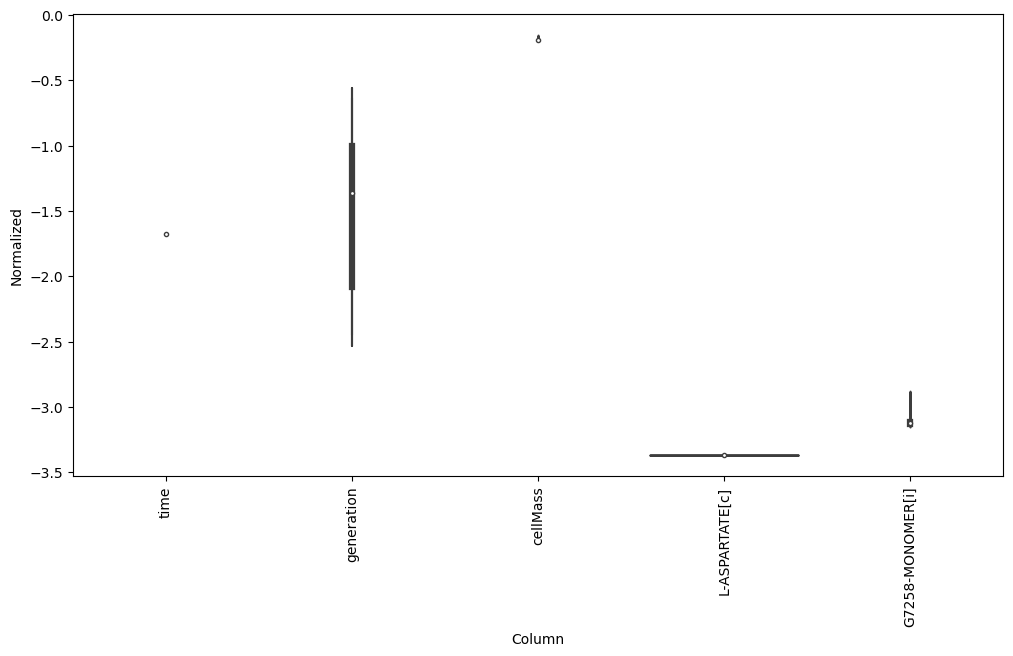

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

df_std = (train_combined[features] - train_mean) / train_std

# Convert the normalized data into long format for visualization using Seaborn
df_std = df_std.melt(var_name='Column', value_name='Normalized')
df_std['Normalized'] = pd.to_numeric(df_std['Normalized'])
# Draw a violin plot to see the distribution of each feature
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)

_ = ax.set_xticklabels(df_std['Column'].unique(), rotation=90)

plt.show()

In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
class WindowGenerator:
    def __init__(self, input_width, label_width, shift,
                 train_df, val_df, test_df, label_columns=None):
        # Store raw data
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label Column name(s): {self.label_columns}'
        ])
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        return inputs, labels
    
    def plot(self, model=None, plot_col='cellMass', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)
            
            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
            if n == 0:
                plt.legend()
        plt.xlabel('Time /s')

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=False,
            batch_size=32
        )
        ds = ds.map(self.split_window)
        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        result = getattr(self, '_example', None)
        if result is None:
            result = next(iter(self.train))
            # and cache for next time
            self._example = result
        return result

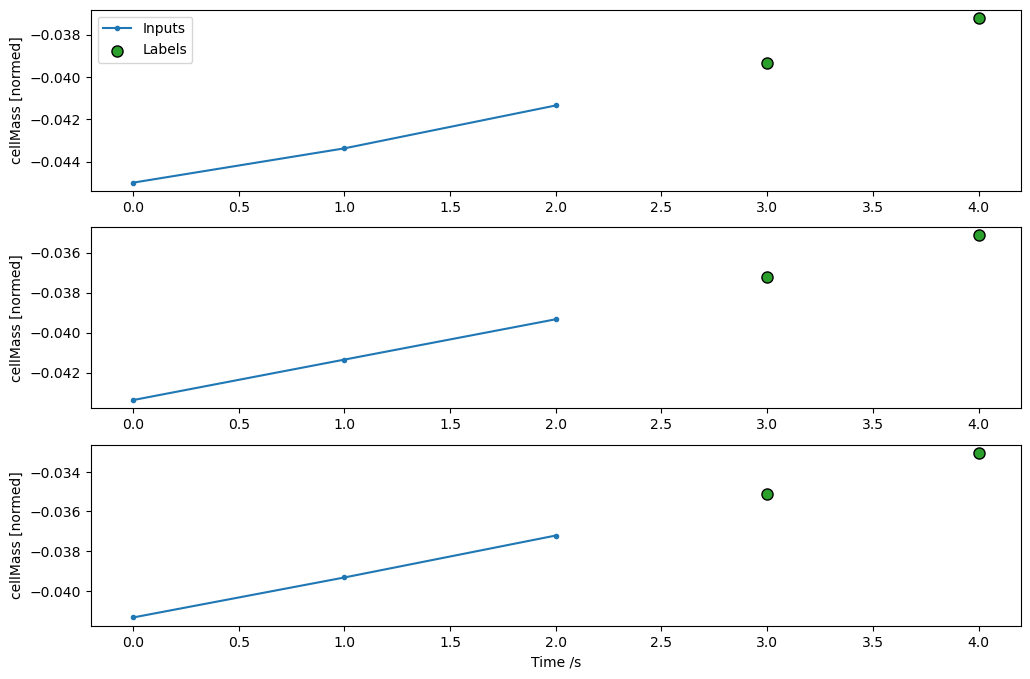

In [22]:
conv_window = WindowGenerator(
    input_width=3,
    label_width=2,
    shift=2,
    train_df=train_combined[features],
    val_df=val_combined[features],
    test_df=test_combined[features],
    label_columns=['cellMass']
)
conv_window.plot()

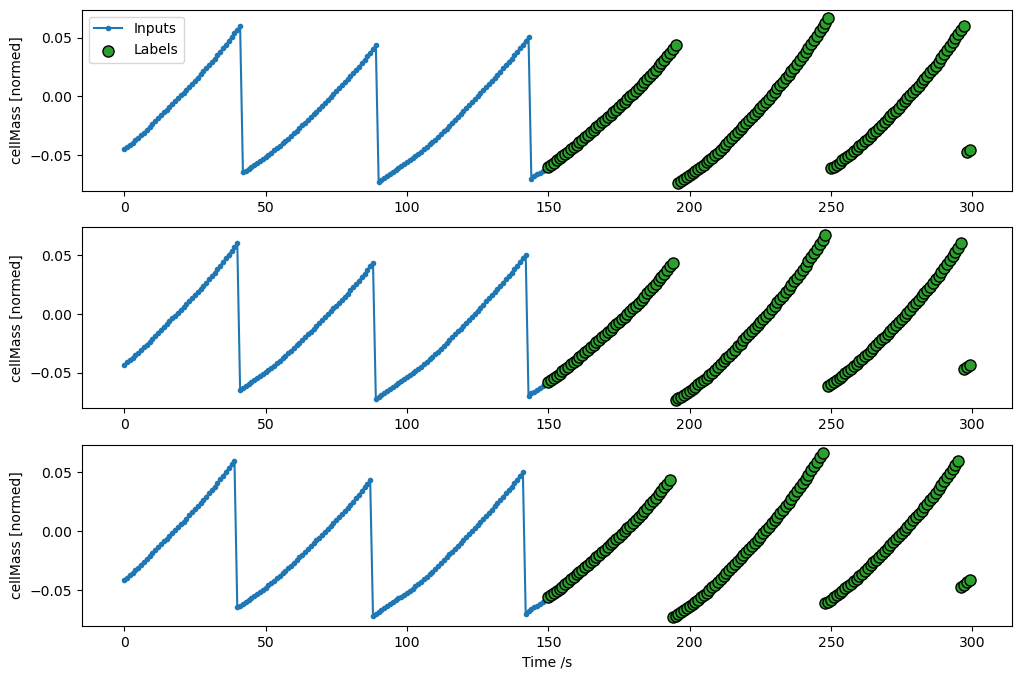

In [27]:
MAX_EPOCHS = 10
OUT_STEPS = 150
multi_window = WindowGenerator(input_width=150,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               label_columns=['cellMass'],
                               train_df=train_combined[features],
                               val_df=val_combined[features],
                               test_df=test_combined[features])

multi_window.plot()
multi_window

multi_lstm_model = tf.keras.Sequential([
    #shape [batch, time, features] => [batch, lstm_units]
    #adding more lstm units just overfits more quickly
    tf.keras.layers.LSTM(32, return_sequences=False),
    #shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*1),
                         # kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, 1])
])

<Figure size 640x480 with 0 Axes>

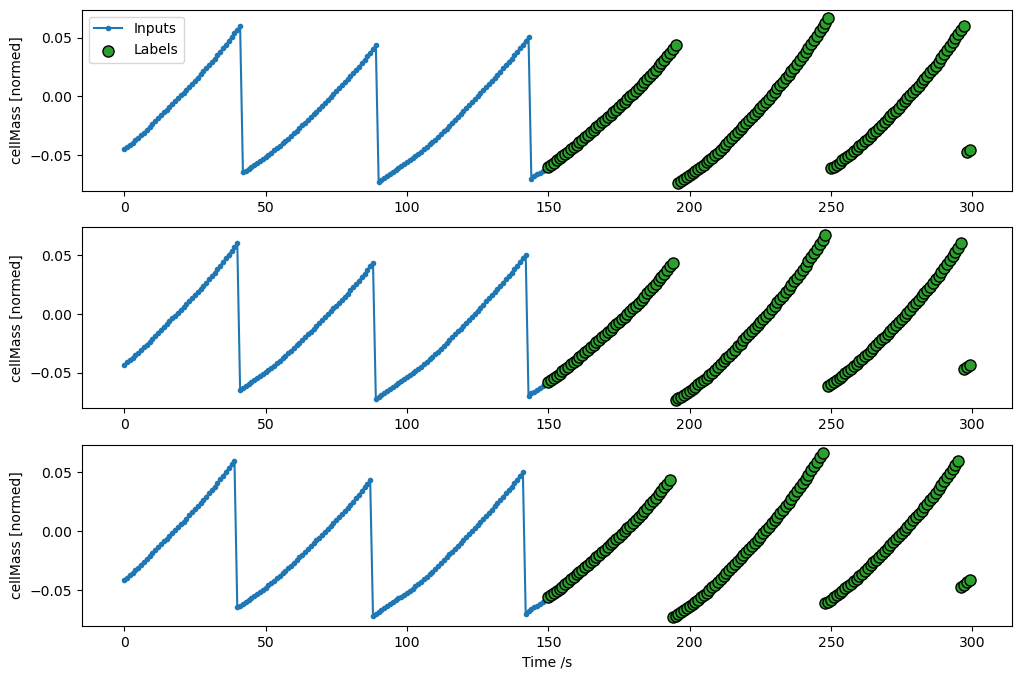

In [30]:
plt.figure()
multi_window.plot()
output_path = "D:\\Bioinformatics\\personal research\\WCM output\\zipA+aa\\ko+wild_aa+gene_180.png"# 替换为你的路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show() 

In [24]:
import pickle
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import os
import datetime
import time
import IPython

2098/2098 ━━━━━━━━━━━━━━━━━━━━ 57s 27ms/step - loss: 0.0014 - mean_absolute_error: 0.0300


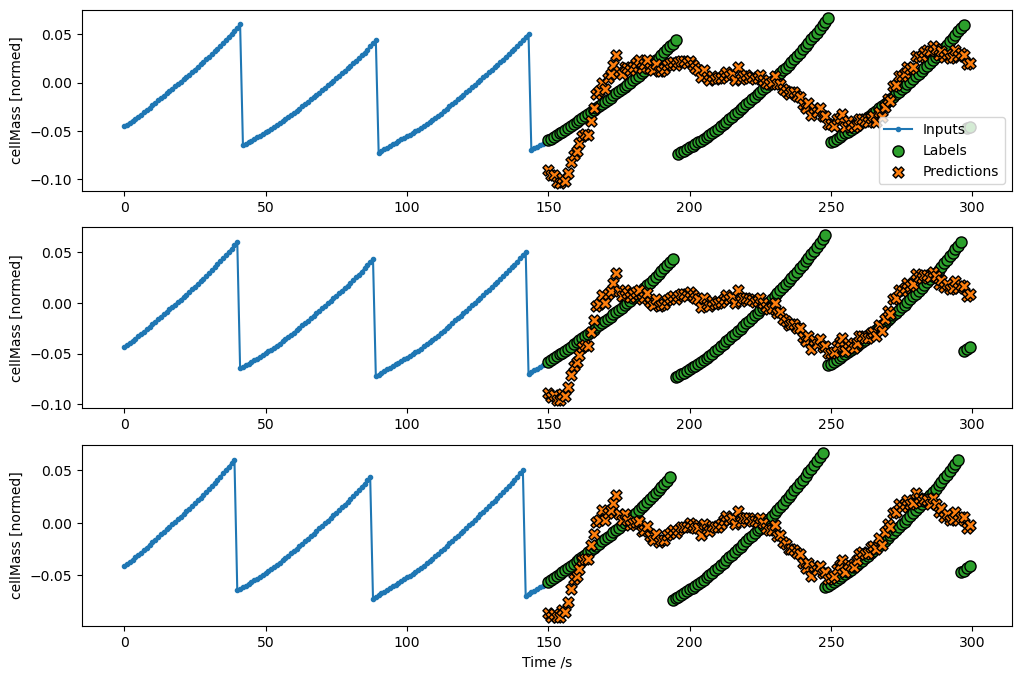

In [28]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

multi_lstm_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
history = multi_lstm_model.fit(multi_window.train, epochs=10,
                    validation_data=multi_window.val,
                    callbacks=[early_stopping])

IPython.display.clear_output()

multi_val_performance = {}
multi_performance = {}

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val, return_dict=True)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_lstm_model)

<Figure size 640x480 with 0 Axes>

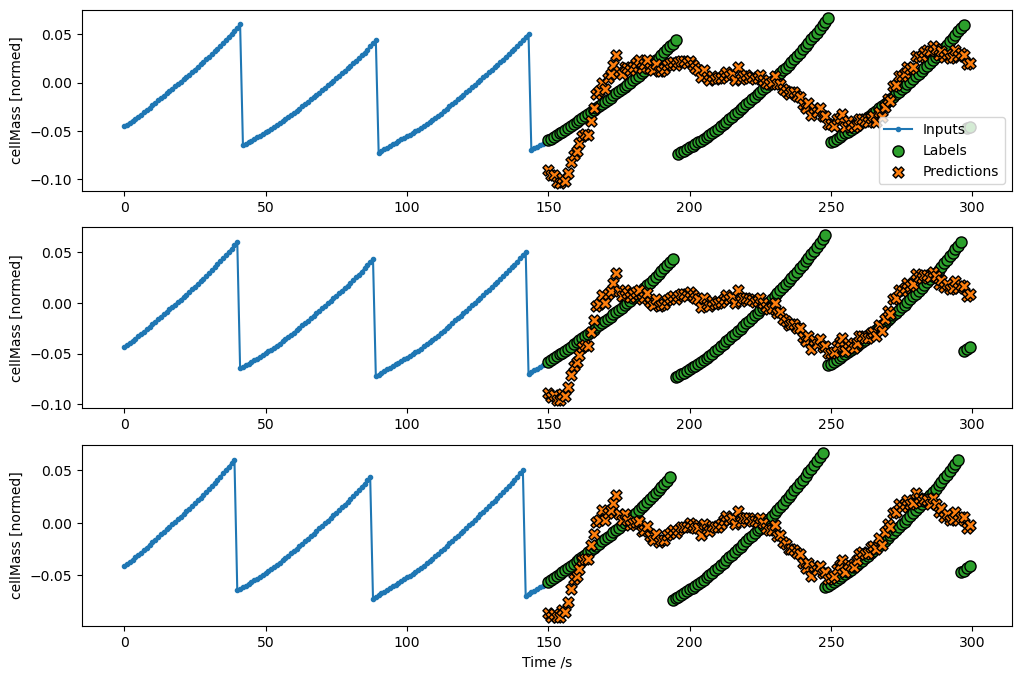

In [ ]:
plt.figure()
multi_window.plot(multi_lstm_model)
output_path = "D:\\Bioinformatics\\personal research\\WCM output\\zipA+aa\\m_ko+wild_aa+gene_180.png"# 替换为你的路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show() 